## Tiền xử lý dữ liệu

In [1]:
# Đảm bảo đúng thư mục hiện tại đang ở thư mục HR Analytics
!pwd
%cd ..

/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/HR Analytics/notebooks
/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/HR Analytics


In [2]:
# Import thư viện
import numpy as np
import matplotlib as plt
import seaborn as sns
from src import *

### Load và đọc dữ liệu

In [3]:
file_path = 'data/raw/aug_train.csv'
with open(file_path, 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
    
data = load_data(file_path, header=header)
columns = data.dtype.names
table = np.column_stack([data[col].astype(str) for col in columns])

# Đọc dữ liệu
print(data.dtype)
for row in table[:5]:
    print("\t".join(row))

[('enrollee_id', '<i8'), ('city', '<U8'), ('city_development_index', '<f8'), ('gender', '<U6'), ('relevent_experience', '<U23'), ('enrolled_university', '<U16'), ('education_level', '<U14'), ('major_discipline', '<U15'), ('experience', '<U3'), ('company_size', '<U9'), ('company_type', '<U19'), ('last_new_job', '<U5'), ('training_hours', '<i8'), ('target', '<f8')]
8949	city_103	0.92	Male	Has relevent experience	no_enrollment	Graduate	STEM	>20			1	36	1.0
29725	city_40	0.7759999999999999	Male	No relevent experience	no_enrollment	Graduate	STEM	15	50-99	Pvt Ltd	>4	47	0.0
11561	city_21	0.624		No relevent experience	Full time course	Graduate	STEM	5			never	83	0.0
33241	city_115	0.789		No relevent experience		Graduate	Business Degree	<1		Pvt Ltd	never	52	1.0
666	city_162	0.767	Male	Has relevent experience	no_enrollment	Masters	STEM	>20	50-99	Funded Startup	4	8	0.0


### Check duplicated rows

In [4]:
has_duplicates = len(data) != len(np.unique(data))
has_duplicates

False

##### Không có dữ liệu trùng lặp

#### Ta thấy cột đầu tiên là ID, ko có ý nghĩa gì nên ta sẽ loại bỏ cột này

In [5]:
# 1. Lọc tên cột ko phải 'id'
new_fields = [name for name in data.dtype.names if name != 'enrollee_id']
data = data[new_fields]

print(data.dtype)
# Đọc dữ liệu
columns = data.dtype.names
table = np.column_stack([data[col].astype(str) for col in columns])
for row in table[:5]:
    print("\t".join(row))

{'names': ['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], 'formats': ['<U8', '<f8', '<U6', '<U23', '<U16', '<U14', '<U15', '<U3', '<U9', '<U19', '<U5', '<i8', '<f8'], 'offsets': [8, 40, 48, 72, 164, 228, 284, 344, 356, 392, 468, 488, 496], 'itemsize': 504}
city_103	0.92	Male	Has relevent experience	no_enrollment	Graduate	STEM	>20			1	36	1.0
city_40	0.7759999999999999	Male	No relevent experience	no_enrollment	Graduate	STEM	15	50-99	Pvt Ltd	>4	47	0.0
city_21	0.624		No relevent experience	Full time course	Graduate	STEM	5			never	83	0.0
city_115	0.789		No relevent experience		Graduate	Business Degree	<1		Pvt Ltd	never	52	1.0
city_162	0.767	Male	Has relevent experience	no_enrollment	Masters	STEM	>20	50-99	Funded Startup	4	8	0.0


### Xử lý Categorical Features
Ta chia Categorical features vào 2 nhóm chính:
- Nominal
- Ordinal

In [6]:
for name in data.dtype.names:
    print(f"{name}: dtype={data[name].dtype}")

city: dtype=<U8
city_development_index: dtype=float64
gender: dtype=<U6
relevent_experience: dtype=<U23
enrolled_university: dtype=<U16
education_level: dtype=<U14
major_discipline: dtype=<U15
experience: dtype=<U3
company_size: dtype=<U9
company_type: dtype=<U19
last_new_job: dtype=<U5
training_hours: dtype=int64
target: dtype=float64


#### Ta tạo các mapping cho company size

In [7]:
company_size_map = {
    '<10': 'Startup',
    '10/49': 'Small',
    '50-99': 'Small',
    '100-500': 'Medium',
    '500-999': 'Medium',
    '1000-4999': 'Large',
    '5000-9999': 'Large',
    '10000+': 'Large'
}

col = data['company_size'].astype(str) 

# Thay thế theo mapping
for old_val, new_val in company_size_map.items():
    col[col == old_val] = new_val

# Gán lại vào array
data['company_size'] = col
data

array([('city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1',  36, 1.),
       ('city_40', 0.776, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', 'Small', 'Pvt Ltd', '>4',  47, 0.),
       ('city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never',  83, 0.),
       ...,
       ('city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', 'Small', 'Pvt Ltd', '4',  44, 0.),
       ('city_65', 0.802, 'Male', 'Has relevent experience', 'no_enrollment', 'High School', '', '<1', 'Medium', 'Pvt Ltd', '2',  97, 0.),
       ('city_67', 0.855, '', 'No relevent experience', 'no_enrollment', 'Primary School', '', '2', '', '', '1', 127, 0.)],
      dtype={'names': ['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'compa

### Xử lý missing values

Có một số cách để xử lý như:
- Bỏ đi các dòng chứa missing value: không chọn vì có khá nhiều missing value, nếu bỏ thì sẽ gây mất mát dữ liệu khá nhiều
- Sử dụng mean, mode: tạm ổn
- sử dụng K-Nearest Neighbour: tạm ổn
- Chuyển missing value thành một giá trị riêng: tốt

Thực tế thì em đã tất cả các cách ở trên để xử lý missing value và em thấy rằng Chuyển missing value thành một giá trị riêng sẽ cho kết quả tốt nhất. Việc chuyển này sẽ được tích hợp trong hàm encode ở phía dưới

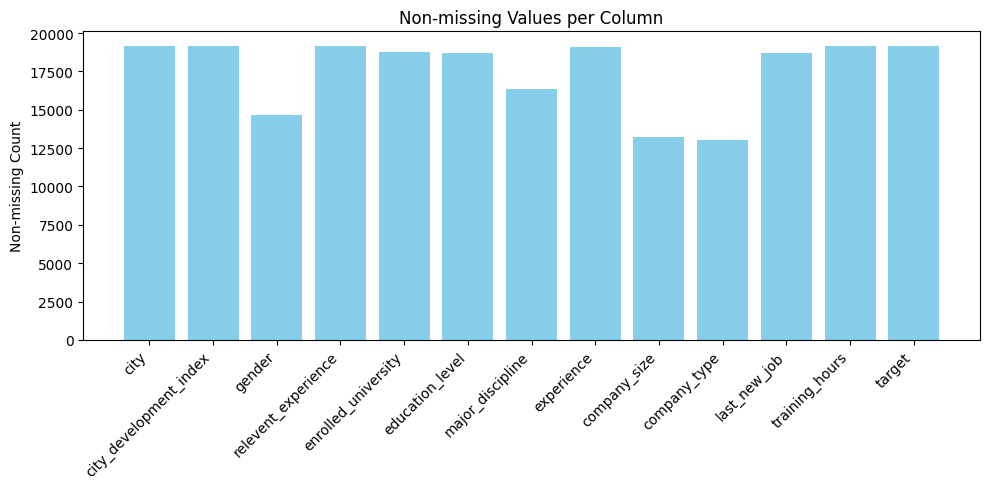

In [8]:
non_missing_count_plot(data)

### Encode dữ liệu dạng chuỗi

In [9]:
cols_to_encode = [name for name in data.dtype.names if ((name != 'target') & (name != 'city_development_index') & (name != 'training_hours'))]
data = encode_data(data, cols_to_encode)
data

array([( 5., 0.92 , 2., 0., 3., 1., 6., 22., 0., 0., 1.,  36, 1.),
       (77., 0.776, 2., 1., 3., 1., 6.,  7., 3., 6., 5.,  47, 0.),
       (64., 0.624, 0., 1., 1., 1., 6., 16., 0., 0., 6.,  83, 0.), ...,
       ( 5., 0.92 , 2., 0., 3., 1., 6., 22., 3., 6., 4.,  44, 0.),
       (94., 0.802, 2., 0., 3., 2., 0., 21., 2., 6., 2.,  97, 0.),
       (95., 0.855, 0., 1., 3., 5., 0., 12., 0., 0., 1., 127, 0.)],
      dtype=[('city', '<f8'), ('city_development_index', '<f8'), ('gender', '<f8'), ('relevent_experience', '<f8'), ('enrolled_university', '<f8'), ('education_level', '<f8'), ('major_discipline', '<f8'), ('experience', '<f8'), ('company_size', '<f8'), ('company_type', '<f8'), ('last_new_job', '<f8'), ('training_hours', '<i8'), ('target', '<f8')])

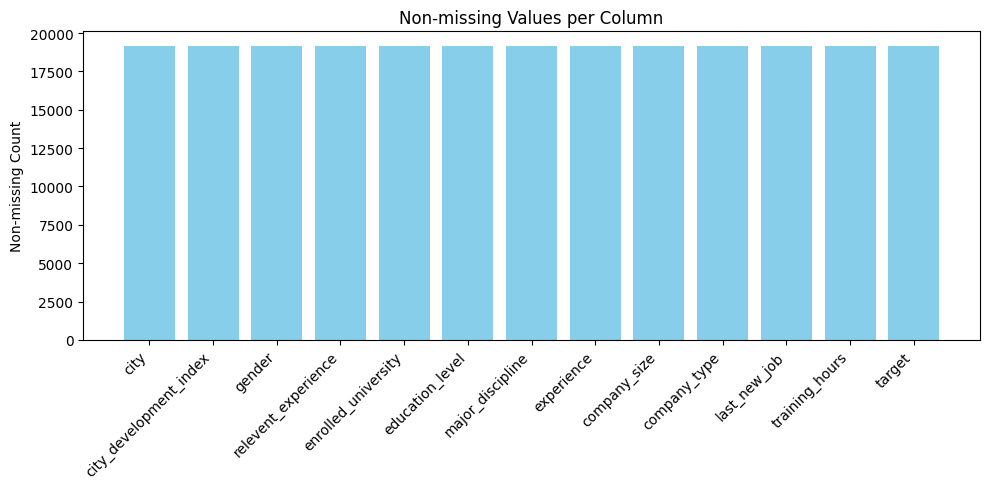

In [10]:
non_missing_count_plot(data)

Ok, vậy là đã không còn missing value nào nữa. Quá trình tiền xử lý đã xong

### Lưu dữ liệu sau khi đã preprocessing

In [11]:
save_path = "./data/processed/train.npy"
np.save(save_path, data)